# Trabajo Integrador

El archivo nacimientos.csv contiene el registro de nacimientos de todo el pais por año y por ciudad, en clase se expondrá la actividad con el análisis de los nacimientos en Azul, Tandil y Olavarría, se utilizarán tecnicas expuestas en clase y se explicará nuevos métodos para replantear el práctico que será presentado por los alumnos en grupos de a 2.

Se solicita:<br>
~~Cargar en una variable el archivo nacimientos.csv.~~
~~Obteenr infomación y descripción del contenido.~~
 ~~Analizar si hay columnas con valores nulos y que cantidad de estos valores por cada una.~~
~~ Copiar en otro DataFrame los registros que solo seran los de Azul, Olavarría, y Tandil.~~
~~Eliminando todas las columnas excepto "departamento_nombre", "anio", "nacimiento_cantidad", "poblacion_total".~~
~~Calcular el porcentaje de nacimientos sobre la población de cada año para cada registro, expresado con 2 decimales y agregarlo en una columna.~~
~~Separar por ciudad y realizar 3 gráficos comparando las 3 ciudades la población tota, los naciomientos, y el porcentaje a lo largo de los años.~~
* Comparar la cantidad total de necimientos del año 2012 al 2014 con los nacimientos totales de los años 2020 al 2022, agrupado por ciudad.
* Graficar los dos períodos por separado en un mismo gráfico y combinar los dos períodos agrupados por ciudad en un solo gráfico

In [25]:
import pandas as pd
import numpy as np

In [26]:
nac=pd.read_csv('nacimientos.csv')

In [27]:
nac.describe()

,provincia_id,departamento_id,anio,nacimientos_cantidad,poblacion_total,tbn
count,5632.000000,5621.000000,5643.000000,5643.000000,5.643000e+03,5643.000000
mean,37.421875,37661.622309,2017.000000,1287.120858,8.581367e+04,15.506339
std,28.768476,28643.194749,3.162558,2870.296846,2.120857e+05,4.142809
min,2.000000,6007.000000,2012.000000,0.000000,3.050000e+02,0.000000
25%,6.000000,6833.000000,2014.000000,173.500000,1.162750e+04,12.620000
50%,30.000000,30091.000000,2017.000000,441.000000,2.755900e+04,15.510000
75%,62.000000,62070.000000,2020.000000,1156.500000,7.089300e+04,18.195000
max,94.000000,94015.000000,2022.000000,45013.000000,3.081550e+06,34.390000


In [28]:
nac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5643 entries, 0 to 5642
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   provincia_id          5632 non-null   float64
 1   provincia_nombre      5643 non-null   object 
 2   departamento_id       5621 non-null   float64
 3   departamento_nombre   5632 non-null   object 
 4   anio                  5643 non-null   int64  
 5   nacimientos_cantidad  5643 non-null   int64  
 6   poblacion_total       5643 non-null   int64  
 7   tbn                   5643 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 352.8+ KB


In [29]:
nac.isna().sum()

provincia_id            11
provincia_nombre         0
departamento_id         22
departamento_nombre     11
anio                     0
nacimientos_cantidad     0
poblacion_total          0
tbn                      0
dtype: int64

In [30]:
aot=nac.loc[(nac['departamento_nombre']=='Azul')|(nac['departamento_nombre']=='Olavarría')|(nac['departamento_nombre']=='Tandil')].copy()
aot.drop(['provincia_id','provincia_nombre','departamento_id'], axis='columns', inplace=True)
aot

,departamento_nombre,anio,nacimientos_cantidad,poblacion_total,tbn
9,Azul,2012,1043,66221,15.75
89,Olavarría,2012,1737,114137,15.22
120,Tandil,2012,1980,127689,15.51
518,Azul,2013,1087,66411,16.37
599,Olavarría,2013,1798,114926,15.64
630,Tandil,2013,1943,129214,15.04
1028,Azul,2014,1095,66598,16.44
1109,Olavarría,2014,1867,115706,16.14
1140,Tandil,2014,2007,130718,15.35
1538,Azul,2015,1027,66782,15.38


In [31]:
aot['porcentaje']=np.round((aot['nacimientos_cantidad']/aot['poblacion_total'])*100 ,2)
aot

,departamento_nombre,anio,nacimientos_cantidad,poblacion_total,tbn,porcentaje
9,Azul,2012,1043,66221,15.75,1.58
89,Olavarría,2012,1737,114137,15.22,1.52
120,Tandil,2012,1980,127689,15.51,1.55
518,Azul,2013,1087,66411,16.37,1.64
599,Olavarría,2013,1798,114926,15.64,1.56
630,Tandil,2013,1943,129214,15.04,1.50
1028,Azul,2014,1095,66598,16.44,1.64
1109,Olavarría,2014,1867,115706,16.14,1.61
1140,Tandil,2014,2007,130718,15.35,1.54
1538,Azul,2015,1027,66782,15.38,1.54


In [32]:
azl=pd.DataFrame(aot[aot['departamento_nombre']=='Azul']).set_index('anio')
ola=pd.DataFrame(aot[aot['departamento_nombre']=='Olavarría']).set_index('anio')
tdl=pd.DataFrame(aot[aot['departamento_nombre']=='Tandil']).set_index('anio')

In [33]:
grafqnac=pd.concat((azl['nacimientos_cantidad'],ola['nacimientos_cantidad'],tdl['nacimientos_cantidad']), axis=1, keys=['Azul','Olavarria','Tandil'])
grafqnac.reset_index()

,anio,Azul,Olavarria,Tandil
0,2012,1043,1737,1980
1,2013,1087,1798,1943
2,2014,1095,1867,2007
3,2015,1027,1766,1899
4,2016,983,1757,1927
5,2017,929,1622,1826
6,2018,949,1474,1725
7,2019,783,1381,1552
8,2020,755,1307,1387
9,2021,655,1081,1336


In [10]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='anio'>

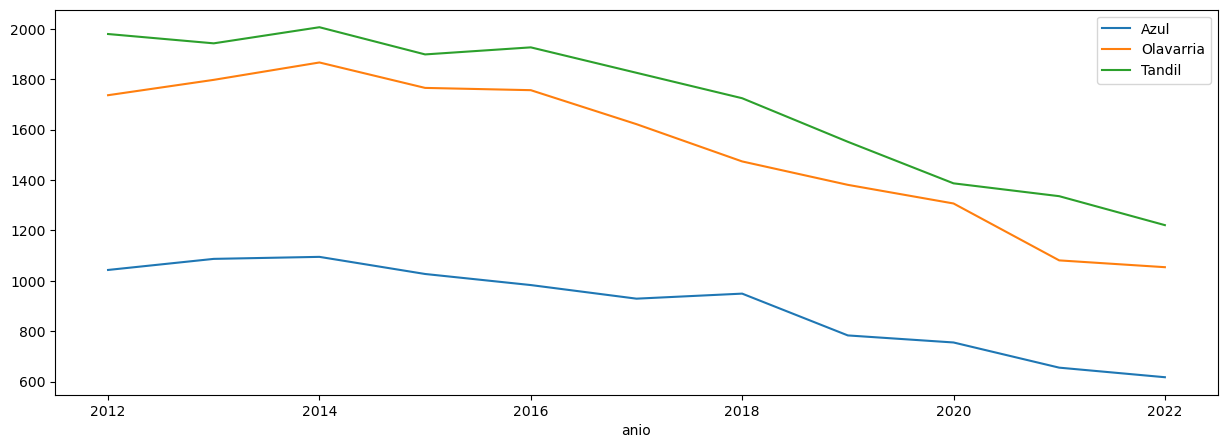

In [11]:
grafqnac.plot(figsize=(15,5))

In [12]:
grafqpor=pd.concat((azl['porcentaje'],ola['porcentaje'],tdl['porcentaje']), axis=1, keys=['Azul','Olavarria','Tandil'])
grafqpor

,Azul,Olavarria,Tandil
anio,,,
2012,1.58,1.52,1.55
2013,1.64,1.56,1.50
2014,1.64,1.61,1.54
2015,1.54,1.52,1.44
2016,1.47,1.50,1.44
2017,1.38,1.37,1.35
2018,1.41,1.24,1.26
2019,1.16,1.16,1.13
2020,1.12,1.09,1.00


<AxesSubplot:xlabel='anio'>

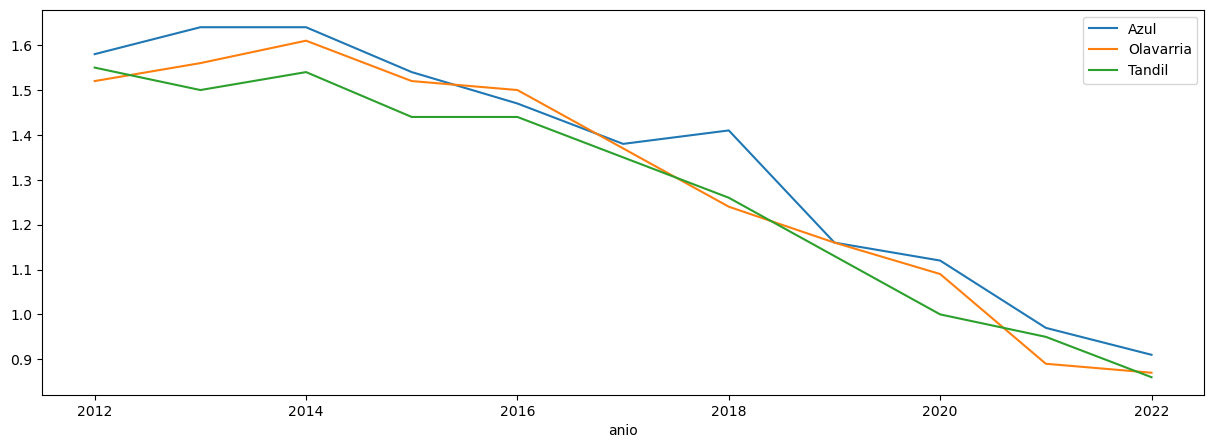

In [13]:
grafqpor.plot(figsize=(15,5))

In [35]:
grafqpt=pd.concat((azl['poblacion_total'],ola['poblacion_total'],tdl['poblacion_total']), axis=1, keys=['Azul','Olavarria','Tandil'])
grafqpt.reset_index()

,anio,Azul,Olavarria,Tandil
0,2012,66221,114137,127689
1,2013,66411,114926,129214
2,2014,66598,115706,130718
3,2015,66782,116473,132199
4,2016,66965,117230,133659
5,2017,67144,117977,135101
6,2018,67321,118715,136522
7,2019,67495,119441,137922
8,2020,67667,120154,139300
9,2021,67835,120858,140657


<AxesSubplot:xlabel='anio'>

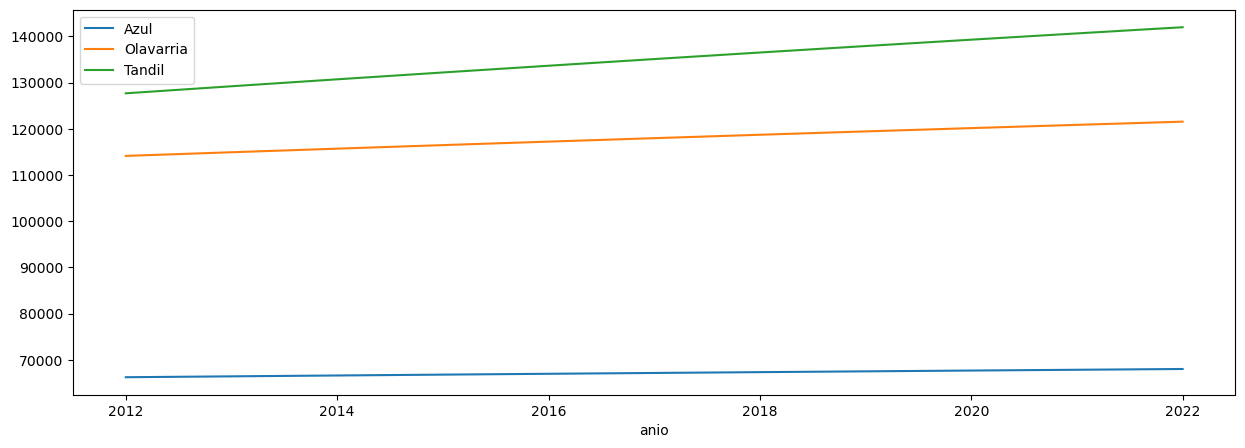

In [15]:
grafqpt.plot(figsize=(15,5))

In [16]:
pv=aot.pivot(index='anio',columns='departamento_nombre',values=['nacimientos_cantidad','porcentaje','poblacion_total'])
pv

nacimientos_cantidad                   porcentaje  \
departamento_nombre                 Azul Olavarría  Tandil       Azul   
anio                                                                    
2012                              1043.0    1737.0  1980.0       1.58   
2013                              1087.0    1798.0  1943.0       1.64   
2014                              1095.0    1867.0  2007.0       1.64   
2015                              1027.0    1766.0  1899.0       1.54   
2016                               983.0    1757.0  1927.0       1.47   
2017                               929.0    1622.0  1826.0       1.38   
2018                               949.0    1474.0  1725.0       1.41   
2019                               783.0    1381.0  1552.0       1.16   
2020                               755.0    1307.0  1387.0       1.12   
2021                               655.0    1081.0  1336.0       0.97   
2022                               617.0    1054.0  1221.0       0.91   

                                     poblacion_total                      
departamento_nombre Olavarría Tandil            Azul Olavarría    Tandil  
anio                                                                      
2012                     1.52   1.55         66221.0  114137.0  127689.0  
2013                     1.56   1.50         66411.0  114926.0  129214.0  
2014                     1.61   1.54         66598.0  115706.0  130718.0  
2015                     1.52   1.44         66782.0  116473.0  132199.0  
2016                     1.50   1.44         66965.0  117230.0  133659.0  
2017                     1.37   1.35         67144.0  117977.0  135101.0  
2018                     1.24   1.26         67321.0  118715.0  136522.0  
2019                     1.16   1.13         67495.0  119441.0  137922.0  
2020                     1.09   1.00         67667.0  120154.0  139300.0  
2021                     0.89   0.95         67835.0  120858.0  140657.0  
2022                     0.87   0.86         68002.0  121552.0  141996.0

<AxesSubplot:xlabel='anio'>

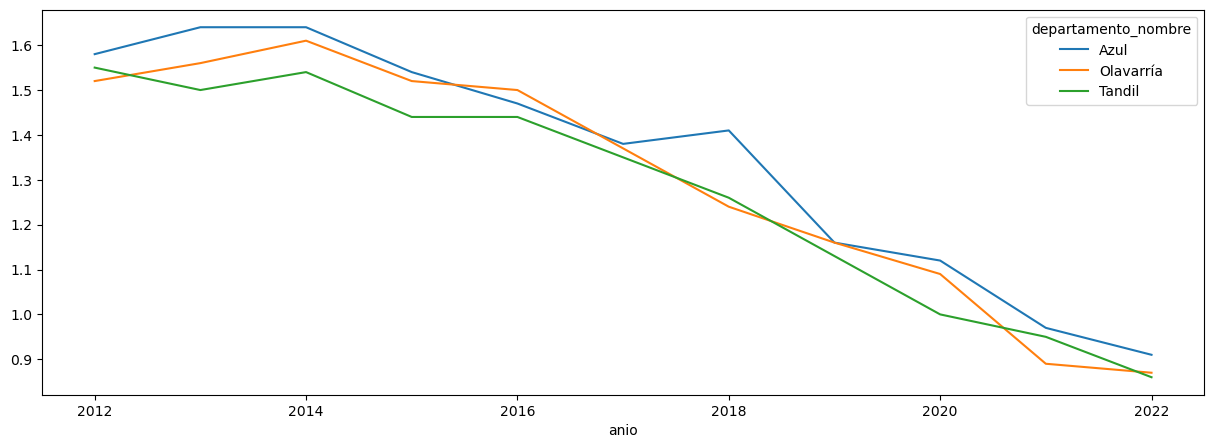

In [17]:
pv['porcentaje'].plot(figsize=(15,5))

In [18]:
pera=pv.loc[2020:2023,'nacimientos_cantidad'].sum()

In [19]:
perb=pv.loc[2012:2015,'nacimientos_cantidad'].sum()

In [20]:
comper=pd.concat((pera,perb),axis=1,keys=('2020','2010'))
comper

,2020,2010
departamento_nombre,,
Azul,2027.0,4252.0
Olavarría,3442.0,7168.0
Tandil,3944.0,7829.0


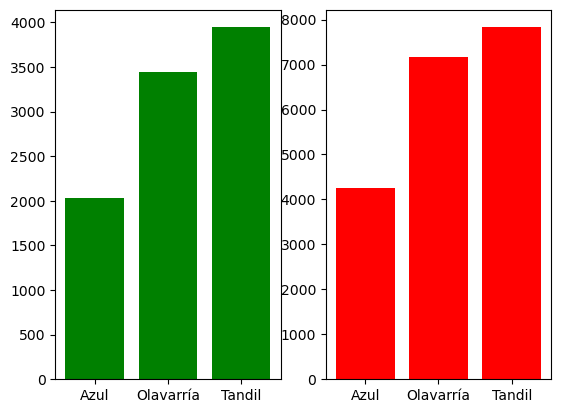

In [21]:
fig, axs = plt.subplots(1,2)
axs[0].bar(comper.index,comper['2020'], color='green')
axs[1].bar(comper.index,comper['2010'], color='red')
plt.show()

<AxesSubplot:xlabel='departamento_nombre'>

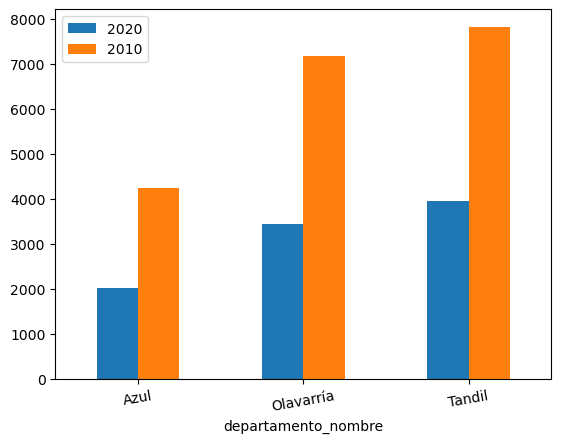

In [22]:
comper.plot.bar(rot=10)